In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

import seaborn as sns
import mapclassify as mc
import matplotlib.pyplot as plt

In [18]:
sns.set_theme()
# sns.set_style('white')
sns.set_context("paper", font_scale = 1)

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
# dataset = pd.read_pickle('../../geodata/results/02_spatial_lagged_master.pkl')
dataset = pd.read_pickle('../../../geodata/results/02_spatial_lagged_master.pkl')

# ch_g2g18  = gpd.read_file('../../geodata/ch_districts/ch_districts_g2g18.gpkg')
ch_g2g18  = gpd.read_file('../../../geodata/ch_districts/ch_districts_g2g18.gpkg')


In [37]:
dataset['z'] = dataset.groupby('GMDNAME')['XGB'].transform(lambda x: (x - x.median()) / x.std())
dataset['err'] = np.log(dataset['XGB'] - dataset['net_income_ptp'])
dataset['zrr'] = dataset.groupby('GMDNAME')['err'].transform(lambda x: np.log(x - x.median()))

/Users/adamswietek/opt/anaconda3/envs/env_intel_sdb/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/adamswietek/opt/anaconda3/envs/env_intel_sdb/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/adamswietek/opt/anaconda3/envs/env_intel_sdb/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/adamswietek/opt/anaconda3/envs/env_intel_sdb/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/adamswietek/opt/anaconda3/envs/env_intel_sdb/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encou

<Axes: xlabel='z', ylabel='Count'>

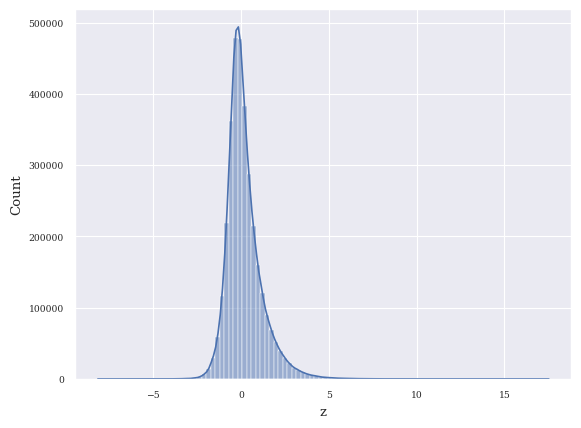

In [61]:
sns.histplot(dataset, x='z', bins=100, kde=True)

In [66]:
sel_10agglo_lst = dataset.groupby(['Agglo_Name','Rich_Nabr'])['GMDNR'].size().unstack().sort_values(by = 'R', ascending = False).head(10).index.tolist()

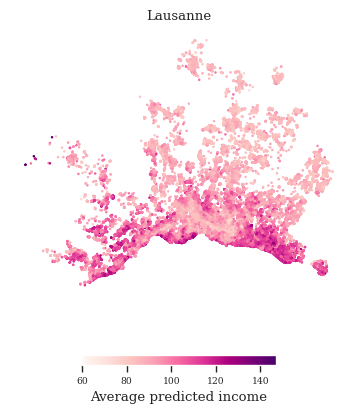

In [78]:
import matplotlib.colors as colors


f, ax = plt.subplots(1, figsize=(5, 5))
gmd = "Lausanne"#sel_10agglo_lst[8]
tgt = 'nabr_avg_pred'
x = dataset.query("Agglo_Name == @gmd")
# g = ch_g2g18.query("GMDNAME == @gmd")
# normalize color
vmin, vmax, vcenter = x[tgt].min(), x[tgt].max(), 0
# norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
norm = colors.LogNorm(vmin=vmin, vmax=vmax)

# g.plot(color='lightgrey', edgecolor='black', figsize=(5, 5), ax = ax)
x.plot(column=tgt, cmap = 'RdPu', s = 1, legend=True, figsize=(5, 5), ax = ax, 
                    legend_kwds={'label': "Average predicted income", 'location':'bottom','orientation': "horizontal", 'shrink': 0.5})

ax.set_title(gmd)
ax.set_axis_off()

<Axes: xlabel='XGB', ylabel='nabr_avg_pred'>

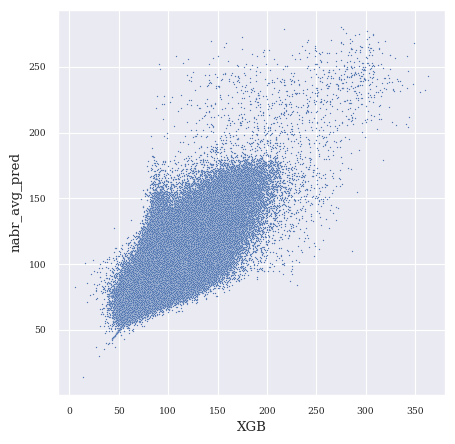

In [51]:
f, ax = plt.subplots(1, figsize=(5, 5))
sns.scatterplot(data = dataset, x = 'zrr', y = 'nabr_avg_pred', s = 1, ax = ax)

ax.set_ylabel('neighbourhood average'), ax.set_xlabel('predicted value')
